# **1. 자전거 대여 수요 예측 경진대회 탐색적 데이터 분석**

# 1.1 데이터 둘러보기

In [1]:
import numpy as np
import pandas as pd # 판다스 임포트

# 데이터 경로
data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv') # 훈련 데이터
test = pd.read_csv(data_path + 'test.csv')   # 테스트 데이터
submission = pd.read_csv(data_path + 'sampleSubmission.csv') # 제출 샘플 데이터

In [2]:
train.shape, test.shape
# trian - 총 10886개의 데이터, 각 데이터에는 12개의 정보
# test - 총 6493개의 데이터, 각 데이터에는 9개의 정보

((10886, 12), (6493, 9))

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


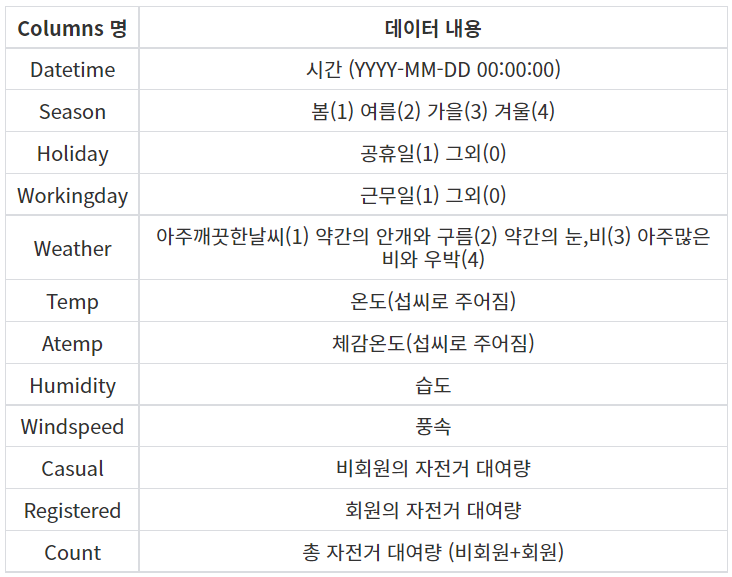

In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


* 훈련 데이터와 테스트 데이터를 비교해봤을 때, 테스트 데이터에 casual과 registered 피처가 없으므로 모델을 훈련할 때도 훈련 데이터의 casual과 registered 피처를 빼야 한다.

In [5]:
submission.head() # 제출 샘플 파일 확인

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


* sample submission에서 보이듯 count를 예측하면 된다고 Label을 명시해준다.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


# 1.2 더 효과적인 분석을 위한 피처 엔지니어링

* 피처 엔지니어링란 설명 변수를 분석하기 좋은 형태로 가공하는 것을 뜻한다.
*  좋은 피처는 데이터를 가장 두드러진 특징을 표현할 뿐만 아니라, 모델의 가정에도 맞아야 한다. 그러므로 피처 엔지니어링이 필요하다.
* 일부 데이터는 시각화하기에 적합하지 않은 형태일 수 있으므로 시각화 하기 전에 해당 피처를 분석하기 적합하게 변환한다.
* datetime 피처는 연도, 월, 일, 시간, 분, 초로 구성되어 있다.
  
  따라서 세부적으로 분석해보기 위해 구성요소별로 나누어 피처 추가한다.
* datetime 피처는 object 타입이기 때문에 문자열처럼 다룰 수 있어 split() 함수를 사용해 공백 기준으로 문자를 나눈다.

In [8]:
print(train['datetime'][100]) # datetime 100번째 요소
print(train['datetime'][100].split()) # 공백 기준으로 문자열 나누기
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[1]) # 시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [9]:
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[0].split('-')) # "_" 기준으로 문자열 나누기
print(train['datetime'][100].split()[0].split('-')[0]) # 연도
print(train['datetime'][100].split()[0].split('-')[1]) # 월
print(train['datetime'][100].split()[0].split('-')[2]) # 일

2011-01-05
['2011', '01', '05']
2011
01
05


In [10]:
print(train['datetime'][100].split()[1]) # 시간
print(train['datetime'][100].split()[1].split(':')) # ":" 기준으로 문자열 나누기
print(train['datetime'][100].split()[1].split(':')[0]) # 시간
print(train['datetime'][100].split()[1].split(':')[1]) # 분
print(train['datetime'][100].split()[1].split(':')[2]) # 초

09:00:00
['09', '00', '00']
09
00
00


In [11]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0]) 
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2]) 
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

판다스 apply() 함수로 앞의 로직을 datetime에 적용해
날짜(date), 연도(year), 월(month), 일(day), 시(hour), 분(minute), 초(second) 피처 생성한다.

In [12]:
from datetime import datetime # datatime 라이브러리 임포트
import calendar

print(train['date'][100]) # 날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()) # 정수로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()]) # 문자열로 요일 반환

2011-01-05
2011-01-05 00:00:00
2
Wednesday


> datetime 모듈
> 
> 날짜와 시간을 조작하는 클래스를 제공한다.

> calendar 모듈
> 
> 달력을 볼 수 있게 해준다.

> calendar.day_name : 현재 로케일의 요일을 나타내는 배열이다.

> strptime() 함수
>
> 날짜와 시간 형식의 문자열을 datetime으로 변환한다.

In [13]:
train['weekday'] = train['date'].apply(
    lambda dateString: 
    calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

* 앞의 로직을 apply() 함수로 적용해 요일(weekday) 피처 추가한다.

> DateString
> 
> 약식 월 이름을 사용하는 MM-dd-yyyy 형식의 시스템 날짜를 반환한다.

In [14]:
train['season'] = train['season'].map({1: 'Spring', 
                                       2: 'Summer', 
                                       3: 'Fall', 
                                       4: 'Winter' })
train['weather'] = train['weather'].map({1: 'Clear', 
                                         2: 'Mist, Few clouds', 
                                         3: 'Light Snow, Rain, Thunder', 
                                         4: 'Heavy Snow, Rain, Thunder'})

* season과 weather 피처는 범주형 데이터인데 현재 1, 2, 3, 4라는 숫자로 표현되어 있어서 정확히 어떤 의미인지 파악하기 어렵다.

  시각화 시 의미가 잘드러나도록 map() 함수를 사용하여 문자열로 변화시킨다.

In [15]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


# 1.3 데이터 시각화

In [16]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

> matplotlib
>
> 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 파이썬 라이브러리로써, 우리는 matplotlib의 pyplot을 이용하게 된다.
>
> matplotlib을 사용하기 위해서는 먼저 matplotlib을 설치하고 matplotlib.pyplot을 import를 해주어야 한다.

분포도

* 분포도(distribution plot)는 수치형 데이터의 집계 값(총 개수, 비율 등)을 나타내는 그래프

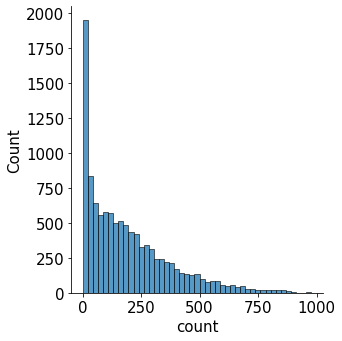

In [17]:
# 타깃값인 count의 분포도 그리기
# 이번 장에서는 타깃값의 분포를 알면 훈련 시 타깃값을 그대로 사용할지 변환해 사용할지 파악할 수 있기 때문

mpl.rc('font', size=15)      # 폰트 크기를 15로 설정 
sns.displot(train['count']); # 분포도 출력

* x축은 타깃값인 count를 나타내고, y축은 총 개수를 나타낸다.
* 분포도를 보면 타깃값인 count가 0 근처에 몰려있다. 즉, 분포가 왼쪽으로 많이 편향되어 있다.
* 회귀 모델이 좋은 성능을 내려면 데이터가 정규분포를 따라야 하는데, 현재 타깃값 count는 정규분포를 따르지 않는다.
* 따라서 현재 타깃값을 그대로 사용해 모델링한다면 좋은 성능을 기대하기 어렵다.

* 데이터 분포를 정규분포에 가깝게 만들기 위해 가장 많이 사용하는 방법은 로그변환이다.
* 로그변환은 count 분포와 같이 데이터가 왼쪽으로 편향되어 있을 때 사용한다.

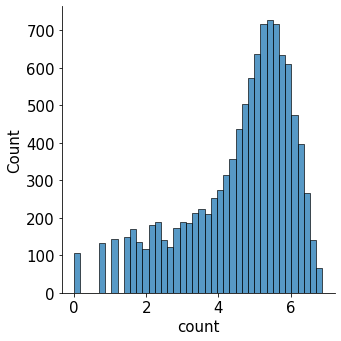

In [18]:
sns.displot(np.log(train['count']));

타깃값 분포가 정규분포에 가까울수록 회귀 모델 성능이 좋다.

피처를 바로 활용해 count를 예측하는 것보다 log(count)를 예측하는 편이 더 정확하다.

따라서 여기서도 타깃값을 log(count)로 변환해 사용한다.

다만, 마지막에 지수변환을 하여 실제 타깃값인 count로 복원해야 한다.

막대 그래프

* 연도, 월, 일, 시, 분, 초별로 총 여섯 가지의 평균 대여 수량을 막대 그래프로 그려보기
* 이 피처들은 범주형 데이터이며 각 범주형 데이터에 따라 평균 대여 수량이 어떻게 다른지 파악한다.

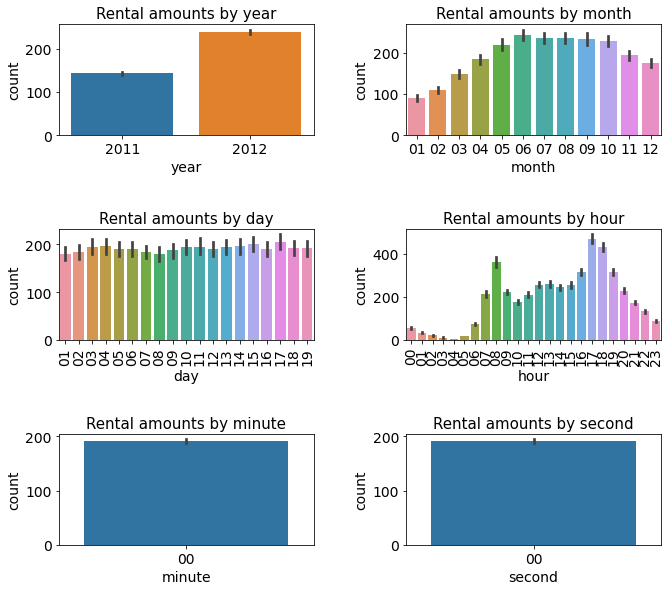

In [19]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=14)       # 폰트 크기 설정
mpl.rc('axes', titlesize=15)  # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성 
plt.tight_layout()            # 그래프 사이에 여백 확보 
figure.set_size_inches(10, 9) # 전체 Figure 크기를 10x9인치로 설정 

# 스텝 2 : 각 축에 서브플롯 할당
# 각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

# 3-2 : 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

박스플롯

* 박스플롯(box plot)은 범주형 데이터에 따른 수치형 데이터 정보를 나타내는 그래프

* 막대 그래프보다 더 많은 정보를 제공하는 특징

* 계절, 날씨, 공휴일, 근무일(범주형 데이터)별 대여 수량(수치형 데이터)을 박스플롯으로 그려보기

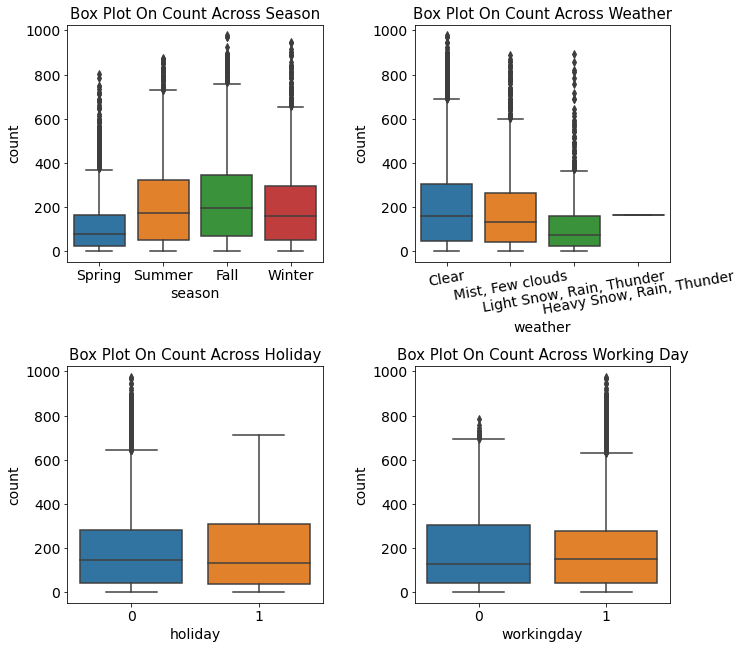

In [20]:
# 스텝 1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 스텝 2 : 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3-2 : x축 라벨 겹침 해결
axes[0, 1].tick_params('x', labelrotation=10) # 10도 회전

tick_params
눈금 레이블/글자 크기 조절

* 계절별 대여 수량 : 자전거 대여 수량은 봄에 가장 적고, 가을에 가장 많음.

* 날씨별 대여 수량 : 날씨가 좋을 때 가장 대여 수량이 많고, 안 좋을수록 수량이 적음.

* 공휴일 여부에 따른 대여 수량 : 공휴일일 때와 아닐 때 자전거 대여 수량의 중앙값은 거의 비슷함. 다만 공휴일이 아닐 때는 이상치가 많음.

* 근무일 여부에 따른 대여 수량 : 근무일일 때와 아닐 때 자전거 대여 수량의 중앙값은 거의 비슷함. 다만 근무일일 때 이상치가 많음.

포인트플롯

* 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량을 포인트플롯(point plot)으로 그려보기

* 포인트플롯은 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 점과 선으로 표시함

* 신뢰구간 : 모수가 어느 구간 안에 있는지를 확률적으로 나타내는 방법

* 막대 그래프와 동일한 정보를 제공하지만, 한 화면에 여러 그래프를 그려 서로 비교해보기에 더 적합함

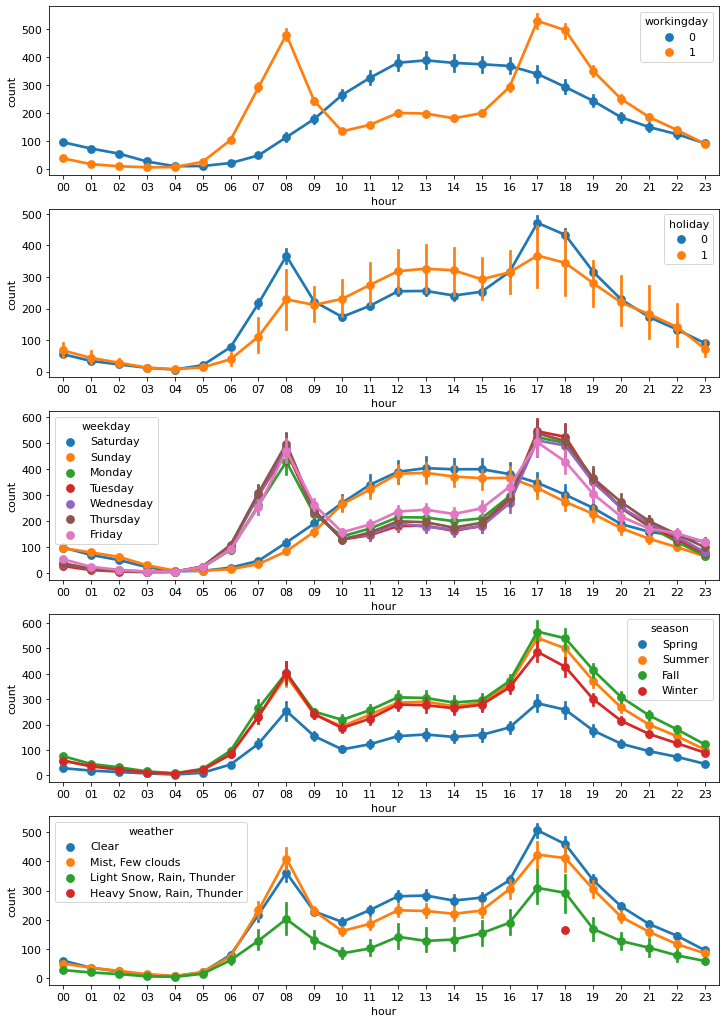

In [21]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font',size=11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12,18)

# 스텝 2 : 서브플롯 타임
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);

회귀선을 포함한 산점도 그래프

* 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량을 포인트플롯(point plot)으로 그려보기

* 포인트플롯은 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 점과 선으로 표시함

* 신뢰구간 : 모수가 어느 구간 안에 있는지를 확률적으로 나타내는 방법

* 막대 그래프와 동일한 정보를 제공하지만, 한 화면에 여러 그래프를 그려 서로 비교해보기에 더 적합함

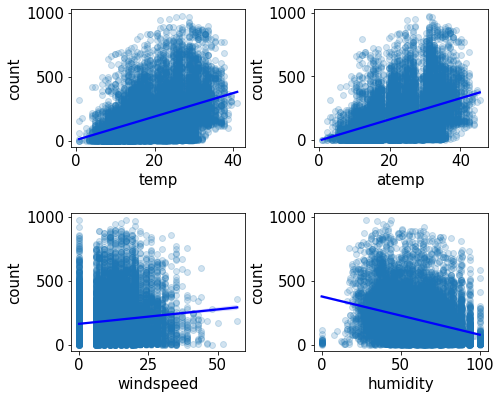

In [22]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

# 스텝 2 : 서브플롯 할당
# 온도, 체감 온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

# regplot() 함수의 파라미터 중 scatter_kws={'alpha': 0.2}는 산점도 그래프에 찍히는 점의 투명도를 조절.
# alpha를 0.2로 설정하면 평소에 비해 20% 수준으로 투명해짐 (alpha가 1이면 완전 불투명하고, 0이면 완전 투명해서 안보임)
# line_kws={'color': 'blue'}는 회귀선의 색상을 선택하는 파라미터 (회귀선이 잘 보이도록 그래프에 찍히는 점보다 짙은 색으로 설정)
# 회귀선(추세선)

* 회귀선 기울기로 대략적인 추세를 파악할 수 있음
* 온도과 체감 온도가 높을수록 대여 수량이 많고, 습도는 낮을수록 대여 수량이 많음
* 다시말해 대여 수량은 추울 때보다 따뜻할 때 많고, 습할 때보다 습하지 않을 때 많음
* 풍속별 대여 수량 산점도 그래프의 회귀선을 보면 풍속이 셀수록 대여 수량이 많음
    * 바람이 약할수록 많을 것 같은 예상과 다른 결과
    * 이유는 windspeed 피처에 결측값이 많기 때문 (관측치가 없거나 오류로 인해 0으로 기록됐을 가능성이 높음)
* 결측값이 많아서 그래프만으로 풍속과 대여 수량의 상관관계를 파악하기 힘듬
* 결측값을 다른 값으로 대체하거나 windspeed 피처를 삭제해야 함. 여기서는 피처 자체를 삭제하도록 함.

히트맵

* temp, atemp, humidity, windspeed, count는 수치형 데이터이며 수치형 데이터끼리 어떤 상관관계가 있는지 알아보기

* corr() 함수는 DataFrame 내의 피처 간 상관계수를 계산해 반환

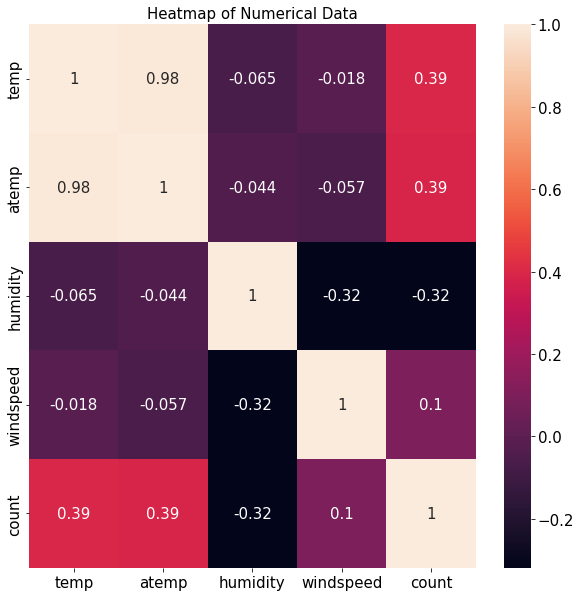

In [23]:

# 피처 간 상관관계 매트릭스
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() 
fig, ax= plt.subplots() 
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기 (annot=True : 상관계수가 숫자로 표시됨)
ax.set(title='Heatmap of Numerical Data');

타깃값인 count와의 상관관계가 중요

* 온도(temp)와 대여 수량(count) 간 상관계수는 0.39로 양의 상관관계를 보임
   * 온도가 높을수록 대여 수량이 많다는 뜻
* 반면, 습도(humidity)와 대여 수량(count) 간 상관계수는 -0.32로 음의 상관관계를 보임
   * 습도가 낮을수록 대여 수량이 많다는 뜻
* 앞서 산점도 그래프와 분석한 내용과 동일
* 풍속(windspeed)과 대여 수량(count)의 상관계수는 0.1로 상관관계가 매우 약함
   * windspeed 피처는 대여 수량 예측에 별 도움을 주지 못할 것으로 예상
   * 성능을 높이기 위해 모델링 시 windspeed 피처 제거
       * 앞의 '회귀선을 포함한 산점도 그래프'에서 결측값이 많다는 이유로 같은 결론에 도달

2. 자전거 대여 수요 예측 경진대회 베이스라인 모델
* 메뉴:[Run]->[Stop Session] 후 여기서부터 실행 권장.(필수아님)

In [24]:
import pandas as pd
# 데이터 경로
data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

# 2.1 피처 엔지니어링

이상치 제거

In [25]:
# 훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]

데이터 합치기

In [26]:
all_data_temp = pd.concat([train, test])
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [27]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


파생 변수(피처) 추가

In [28]:
from datetime import datetime

# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# 요일 피처 생성
all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

필요 없는 피처 제거

In [29]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month']

all_data = all_data.drop(drop_features, axis=1)

데이터 나누기

In [30]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] # 타깃값

In [31]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


# 2.2 평가지표 계산 함수 작성

In [32]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

# 2.3 모델 훈련

In [33]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [34]:
log_y = np.log(y)  # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y) # 모델 훈련

LinearRegression()

# 2.4 모델 성능 검증

In [35]:
preds = linear_reg_model.predict(X_train)

In [36]:
print (f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형회귀의 RMSLE 값 : 1.0205


# 2.5 예측 및 결과 제출

In [37]:
linearreg_preds = linear_reg_model.predict(X_test) # 테스트 데이터로 예측

submission['count'] = np.exp(linearreg_preds)    # 지수변환
submission.to_csv('first_submission.csv', index=False) # 파일로 저장

자, 여러분들이 여기까지 정상적으로 하셨다면 'Output/kaggle/working에 fist_submission.csv'이 생성되었을 겁니다.
저 파일을 다운로드해서 직접 대회에 제출하고 평가 점수를 살펴보세요.

# **3. 자전거 대여 수요 예측 경진대회 모델 성능 개선**
* 메뉴:[Run]->[Stop Session] 후 여기서부터 실행권장.(필수아님)

In [38]:
import pandas as pd
# 데이터 경로
data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

**피처 엔지니어링**

이상치 제거

In [39]:
# 훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]

데이터 합치기

In [40]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


> CONCAT 함수
> 
> 두 표현식을 연결하고 결과 표현식을 반환한다. 2개 이상의 표현식을 연결하려면 CONCAT 함수를 중첩시켜 사용한다.

파생 변수(피처) 추가

In [41]:
from datetime import datetime

# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# 요일 피처 생성
all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

필요 없는 피처 제거

In [42]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month']

all_data = all_data.drop(drop_features, axis=1)

데이터 나누기

In [43]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] # 타깃값

평가지표 계산 함수 작성

In [44]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

# **3.1 성능 개선 1 : 릿지 회귀 모델**

# 3.1.1 하이퍼 파라미터 최적화(모델 훈련)

모델 생성

In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

그리드서치 객체 생성

In [46]:
# 하이퍼 파라미터 값 목록
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
# 그리드서치(with 릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,   # 릿지 모델
                                      param_grid=ridge_params, # 값 목록
                                      scoring=rmsle_scorer,    # 평가지표
                                      cv=5)                    # 교차검증 분할 수

> RMSE
>
> RMSE는 MSE를 제곱근한 값인데, MSE는 제곱된 오차들의 평균이기 때문에 그 값의 단위를 원래 정답값과 맞춰주고자 제곱근을 씌운다는 개념이 담겨있습니다.

그리드서치 수행

In [47]:
log_y = np.log(y) # 타깃값 로그변환
gridsearch_ridge_model.fit(X_train, log_y) # 훈련(그리드서치)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [48]:
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.1, 'max_iter': 3000}


# 3.1.2 성능 검증

In [49]:
# 예측
preds = gridsearch_ridge_model.best_estimator_.predict(X_train) 

# 평가
print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}') 

릿지 회귀 RMSLE 값 : 1.0205


# **3.2 성능 개선 2 : 라쏘 회귀 모델**

# 3.2.1 하이퍼 파라미터 최적화(모델 훈련)

In [50]:
from sklearn.linear_model import Lasso

# 모델 생성
lasso_model = Lasso()
# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.00125, 'max_iter': 3000}


# 3.2.2 성능 검증

In [51]:
# 예측
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# 평가
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

라쏘 회귀 RMSLE 값 : 1.0205


# **3.3 성능 개선 3 : 랜덤 포레스트 회귀 모델**

# 3.3.1 하이퍼 파라미터 최적화(모델훈련)

In [52]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()
# 그리드서치 객체 생성
rf_params = {'random_state':[42], 'n_estimators':[100, 120, 140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


# 3.3.2 모델 성능 검증

In [53]:
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값 : 0.1127


# 3.3.3 예측 및 결과 제출

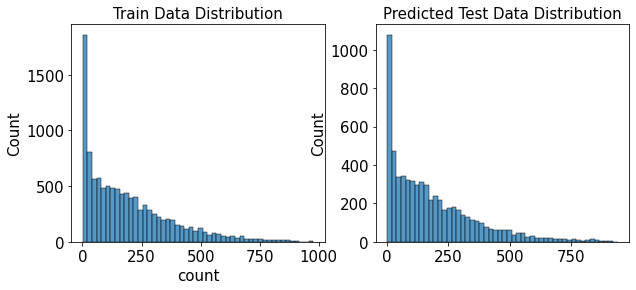

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

In [55]:
submission['count'] = np.exp(randomforest_preds) # 지수변환
submission.to_csv('second_submission.csv', index=False)

참고자료
https://velog.io/@leehye/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%94%A5%EB%9F%AC%EB%8B%9D-%EB%AC%B8%EC%A0%9C%ED%95%B4%EA%B2%B0-%EC%A0%84%EB%9E%B5